In [506]:
# Import relevant libraries for image processing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import io, exposure, measure
from skimage.color import rgb2gray, label2rgb
from skimage.filters import sobel, gaussian, threshold_otsu
from skimage.restoration import inpaint
from skimage.segmentation import slic
from skimage.feature import canny, corner_harris, corner_peaks, Cascade

In [333]:
# Define a function for image printing
def show_image(image, title='image'):
    """Displays an image with a title."""
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('Off')
    plt.show()

In [182]:
# Define a function for image comparison
def compare_images(image1, image2, title1="Image 1", title2="Image 2"):
    """Displays two images side by side for comparison."""
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(image1, cmap='gray' if len(image1.shape) == 2 else None)
    axes[0].set_title(title1)
    axes[0].axis("off")

    axes[1].imshow(image2, cmap='gray' if len(image2.shape) == 2 else None)
    axes[1].set_title(title2)
    axes[1].axis("off")
    
    plt.show()

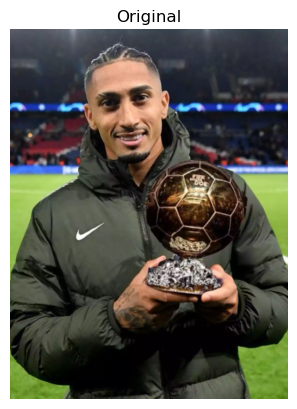

In [381]:
# Load and view raphinha's image
rapha_image = io.imread('Downloads/gh2vcjawmaabvvs_1200_1600.webp')
show_image(rapha_image, title='Original')

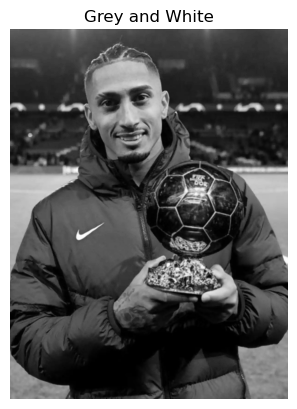

In [335]:
# Convert the image to a gray scale
rapha_bw = rgb2gray(rapha_image)
show_image(rapha_bw, title='Grey and White')

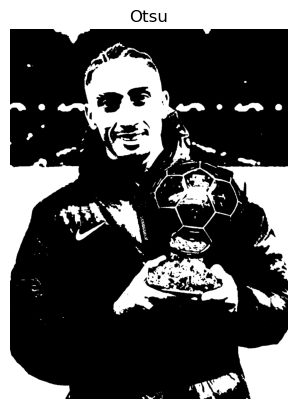

In [542]:
# Otsu threshold
thresh = threshold_otsu(rapha_bw)
rapha_otsu = rapha_bw > thresh
show_image(rapha_otsu, title='Otsu')

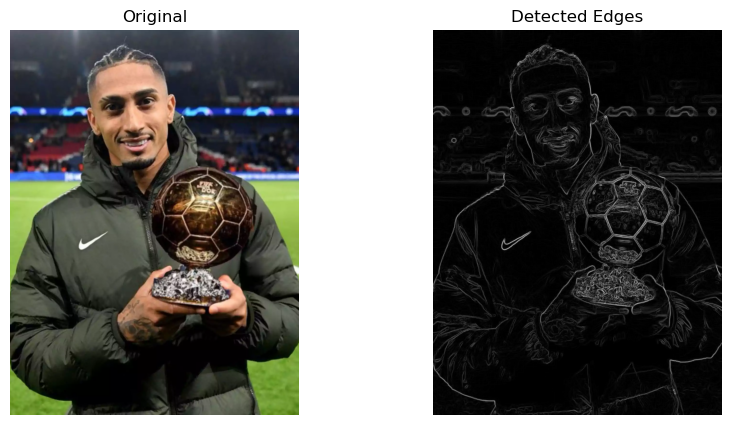

In [375]:
# Detect edges using the sobel algorithm
rapha_edge = sobel(rapha_bw)
compare_images(rapha_image, rapha_edge, "Original", "Detected Edges")

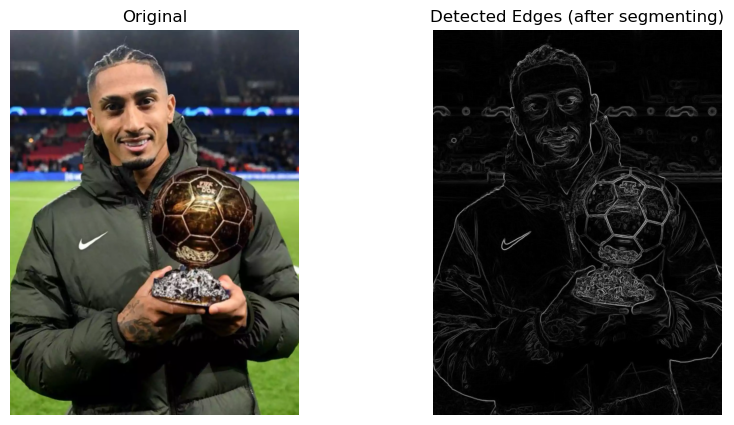

In [540]:
# Detect edges using the sobel algorithm, but with otsu segmentation
compare_images(rapha_image, rapha_edge, "Original", "Detected Edges (after segmenting)")

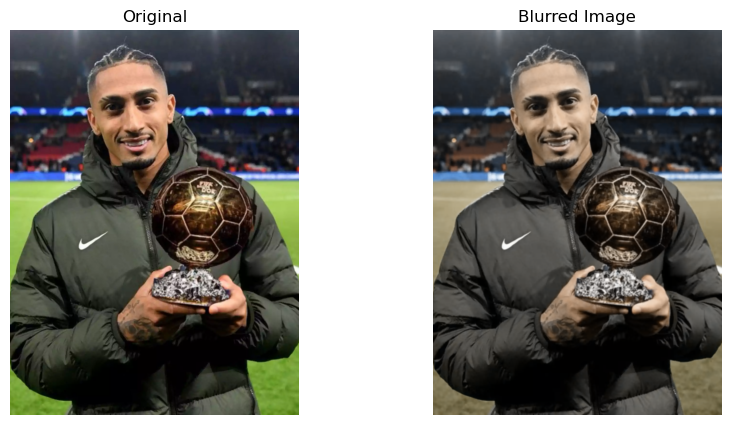

In [215]:
# Test the gaussian blur filter
rapha_blur = gaussian(rapha_image)
compare_images(rapha_image, rapha_blur, "Original", "Blurred Image")

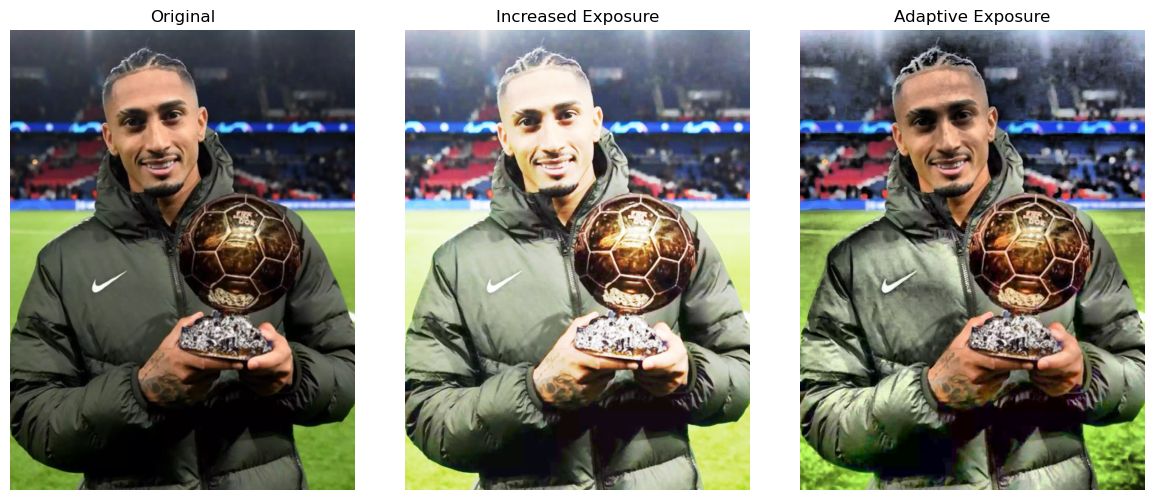

In [170]:
# Test exposure
rapha_eq1 = exposure.equalize_hist(rapha_image)
rapha_eq2 = exposure.equalize_adapthist(rapha_image, clip_limit = 0.03)

compare_images(rapha_image, rapha_eq1, rapha_eq2, 'Original', 'Increased Exposure','Adaptive Exposure')

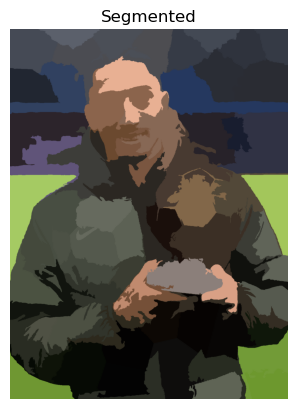

In [313]:
# Segement image
rapha_segment = slic(rapha_image)
rapha_segment_lay = label2rgb(rapha_segment, rapha_image, kind='avg')
show_image(rapha_segment_lay, 'Segmented')

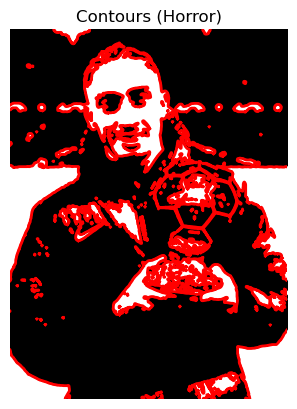

In [347]:
# Find contours
rapha_cont = measure.find_contours(rapha_otsu, 0.8)

# Display the original image
plt.imshow(rapha_otsu, cmap='gray')
plt.title("Contours (Horror)")
plt.axis('off')

# Overlay contours
for contour in rapha_cont:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2, color='red')

plt.show()

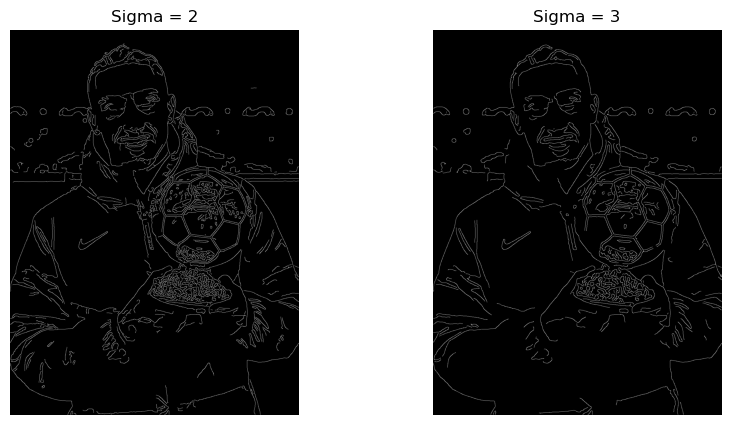

In [377]:
# Detect edges using canny with different gaussian values
rapha_edge1 = canny(rapha_bw, sigma = 2)
rapha_edge2 = canny(rapha_bw, sigma = 3)

compare_images(rapha_edge1, rapha_edge2, "Sigma = 2", "Sigma = 3")

In [389]:
# Define a function for corner markers
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

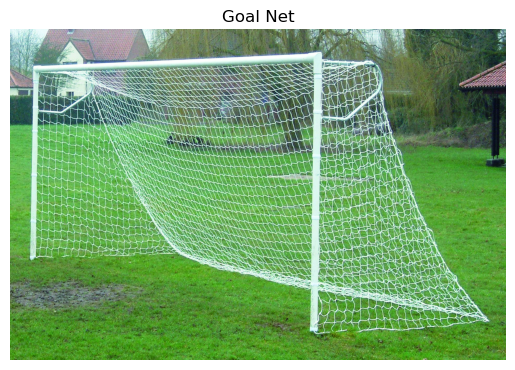

In [450]:
# Load goal net image then convert to gray and white
goal = io.imread('Downloads/10331.jpg')
goal_bw = rgb2gray(goal)
show_image(goal, title='Goal Net')

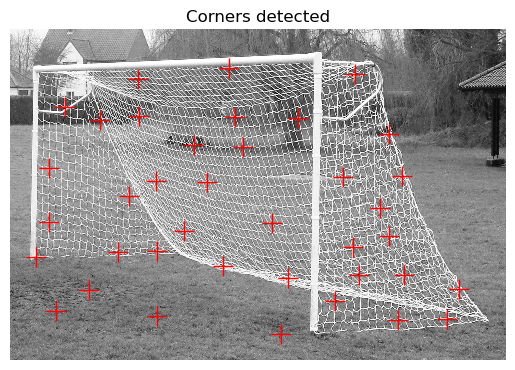

In [460]:
# Detect corners
goal_corners = corner_harris(goal_bw)
# Calculate Coordinates
coords = corner_peaks(goal_corners, min_distance=100, threshold_rel=0.02)
show_image_with_corners(goal_bw, coords, title="Corners detected")

In [504]:
# Define a function for face detection visualization
def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2
            )
        )
    plt.show()

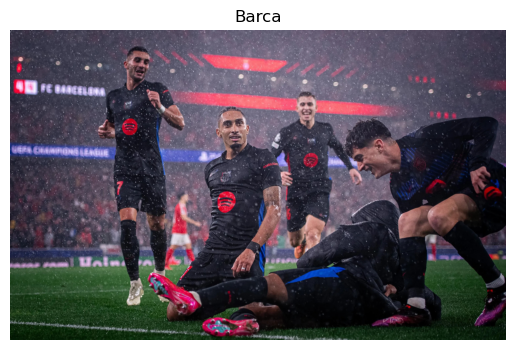

In [524]:
# Detect players faces
players = io.imread('Downloads/mini__MGA4173.jpg')
show_image(players,title='Barca')

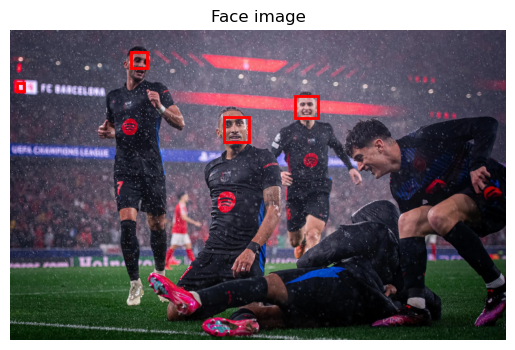

In [538]:
trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)
detected = detector.detect_multi_scale(img = players,
                                       scale_factor = 1.3,
                                       step_ratio = 1,
                                       min_size = (10,10),
                                       max_size = (200,200))
show_detected_face(players, detected, title="Face image")

In [550]:
# Define a function that extracts face coordinates
def getFaceRectangle(image, d):
    ''' Extracts the face rectangle from the image using the coordinates of the detected face. '''
    
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    
    # The width and height of the face rectangle
    width = x + d['width']
    height = y + d['height']
    
    # Extract the detected face
    face = image[x:width, y:height]
    
    return face

In [552]:
# Define a function that overlays blur over faces
def mergeBlurryFace(original, gaussian_image, d):
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    
    # The width and height of the face rectangle
    width = x + d['width']
    height = y + d['height']
    
    # Merge the blurred face into the original image
    original[x:width, y:height] = gaussian_image
    
    return original

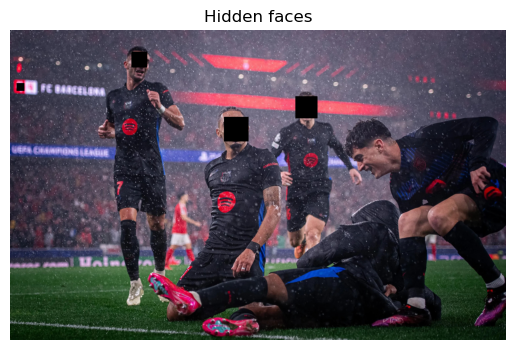

In [566]:
# Hiding faces for privacy
for d in detected:  
    face = getFaceRectangle(players,d)
    blurred_face = gaussian(face, sigma = 8)
    resulting_image = mergeBlurryFace(players, blurred_face, d) 
show_image(resulting_image, "Hidden faces")